In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/matches.csv
/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
deli = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv")
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
team_mapping = {
    "Mumbai Indians":"MI",
    "Kolkata Knight Riders":"KKR",
    "Chennai Super Kings":"CSK",
    "Royal Challengers Bangalore":"RCB",
    "Rajasthan Royals":"RR",
    "Kings XI Punjab":"KXIP",
    "Sunrisers Hyderabad":"SRH",
    "Delhi Daredevils":"DD",
    "Delhi Capitals":"DC",
    "Deccan Chargers":"DCS",
    "Punjab Kings":"PK",
    "Gujarat Titans":"GT",
    "Pune Warriors":"PW",
    "Lucknow Super Giants":"LSG",
    "Gujarat Lions":"GL",
    "Rising Pune Supergiant":"RPS",
    "Royal Challengers Bengaluru":"RCB",
    "Kochi Tuskers Kerala":"KTK",
    "Rising Pune Supergiants":"RPSG",
    
}
deli['batting_team'] = deli['batting_team'].replace(team_mapping)
deli['bowling_team'] = deli['bowling_team'].replace(team_mapping)


*Teams have been given their respective short names*

In [5]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
print(deli.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


*Indicates which all columns contains null values*

In [7]:
print(deli.duplicated().sum())


0


*There are no duplicate values in any of the columns*

In [8]:

columns_to_check = [1, 4, 5, 9, 10, 11, 13]  

negative_values_present = (deli.iloc[:, columns_to_check] < 0).any().any()


if negative_values_present:
    print("There are negative values in the specified columns.")
else:
    print("No negative values found in the specified columns.")


deli = deli[(deli.iloc[:, columns_to_check] >= 0).all(axis=1)]


No negative values found in the specified columns.


*There are no negative values*

In [9]:
print (deli['batting_team'].count())
print (deli['batting_team'].value_counts())

260920
batting_team
MI      31437
RCB     30023
KKR     29514
CSK     28651
RR      26242
KXIP    22646
SRH     21843
DD      18786
DC      10946
DCS      9034
PK       6833
GT       5494
PW       5443
LSG      5400
GL       3566
RPS      1900
KTK      1582
RPSG     1580
Name: count, dtype: int64


In [10]:
match = pd.read_csv("/kaggle/input/ipl-complete-dataset-20082020/matches.csv")
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [11]:

num_rows = match.shape[0]
print("Number of rows:", num_rows)


Number of rows: 1095


In [12]:

match['city'] = match['city'].fillna(match['city'].mode()[0])


print(match['city'].isnull().sum())  # This should return 0 if all NaNs were filled


0


*There are some null values in the column city. Those are filled with the mode of the column.*

In [13]:
print(match[match['result_margin'].isnull()])


          id   season       city        date match_type player_of_match  \
66    392190     2009  Cape Town  2009-04-23     League       YK Pathan   
130   419121  2009/10    Chennai  2010-03-21     League        J Theron   
241   501265     2011      Delhi  2011-05-21     League             NaN   
328   598004     2013  Hyderabad  2013-04-07     League       GH Vihari   
342   598017     2013  Bangalore  2013-04-16     League         V Kohli   
416   729315     2014  Abu Dhabi  2014-04-29     League     JP Faulkner   
475   829741     2015  Ahmedabad  2015-04-21     League        SE Marsh   
485   829763     2015  Bangalore  2015-04-29     League             NaN   
511   829813     2015  Bangalore  2015-05-17     League             NaN   
610  1082625     2017     Rajkot  2017-04-29     League       KH Pandya   
705  1175365     2019      Delhi  2019-03-30     League         PP Shaw   
744  1178424     2019  Bengaluru  2019-04-30     League             NaN   
746  1178426     2019    

In [14]:

match = match[match['result'] != 'no result']


print(f"Rows remaining: {len(match)}")


Rows remaining: 1090


*In the column 'result' there were 5 rows in which the result were shown 'no result'. In that particular row , the columns 'winner' and 'player of the match' also contained null values. So those 5 rows are dropped. *

In [15]:
print(match.isnull().sum())

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        14
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64


*Few columns contains null values. 'result_margin' contains null values because few matches are tied.*

In [16]:

match_cleaned = match.dropna(subset=['winner', 'player_of_match'], how='all')


print(match_cleaned.isnull().sum())  # Check if any missing values remain in 'winner' and 'player_of_match'


id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        14
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64


*Rows in which the winner and player of the match are shown null are dropped off.*

In [17]:
match_cleaned.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [18]:
print(match_cleaned.duplicated().sum())


0


In [19]:
date_list = match_cleaned['date'].tolist()
date_list = pd.to_datetime(date_list)
match_cleaned['date_new'] = date_list

match_cleaned['date'] = match_cleaned['date_new']
match_cleaned.drop('date_new', axis=1, inplace=True)
match_cleaned.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


*The datatype of the column 'date' is changed to datetime64;*

In [20]:

print(match_cleaned['date'].dtype)


datetime64[ns]


In [21]:
match_cleaned['team1'] = match_cleaned['team1'].replace(team_mapping)
match_cleaned['team2'] = match_cleaned['team2'].replace(team_mapping)
match_cleaned['toss_winner'] = match_cleaned['toss_winner'].replace(team_mapping)
match_cleaned['winner'] = match_cleaned['winner'].replace(team_mapping)

match_cleaned.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,DD,RR,RR,bat,DD,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,MI,RCB,MI,bat,RCB,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,KKR,DCS,DCS,bat,KKR,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


*Team names are replaced with their abbreviations.*

In [23]:
match_cleaned = match_cleaned[(match_cleaned.iloc[:, 13:16] >= 0).all(axis=1)]

*This ensure whether the columns 'result_margin, 'target_runs ', 'target_overs ' doesn't contain any negative values. *

In [24]:
print (match_cleaned['winner'].count())
team_wins = match_cleaned['winner'].value_counts()
print(team_wins)

1076
winner
MI      142
CSK     138
KKR     130
RCB     121
RR      110
SRH      87
KXIP     85
DD       67
DC       45
DCS      29
GT       28
PK       24
LSG      24
GL       13
PW       12
RPS      10
KTK       6
RPSG      5
Name: count, dtype: int64


*List of teams and their matches won*

In [25]:
print (match_cleaned['player_of_match'].count())
player_mom = (match_cleaned['player_of_match'].value_counts())
print(player_mom)

1076
player_of_match
AB de Villiers    24
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           17
                  ..
CL White           1
A Chandila         1
MS Bisla           1
MS Gony            1
Shahbaz Ahmed      1
Name: count, Length: 290, dtype: int64


*List of number of times a particular player has won man of the matches.*

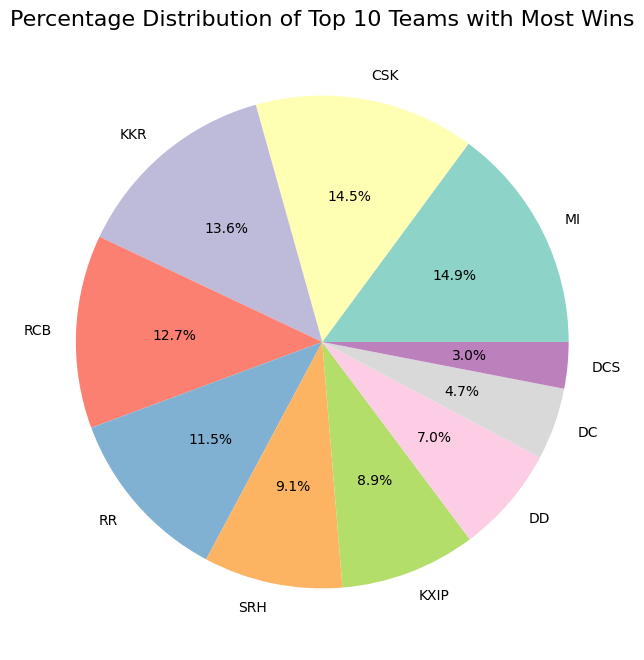

In [26]:
# Plot a pie chart for the distribution of wins
plt.figure(figsize=(8, 8))
team_wins.head(10).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3", len(team_wins.head(10))), legend=False)
plt.title('Percentage Distribution of Top 10 Teams with Most Wins', fontsize=16)
plt.ylabel('')
plt.show()


*The above pie chart depicts the team which has won most number of matches. It is clear that Mumbai Indians tops it.*

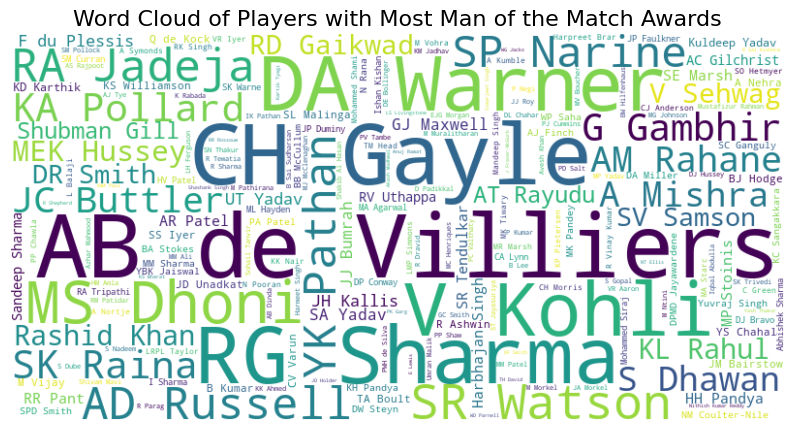

In [27]:
from wordcloud import WordCloud

# Create a word cloud for the players of the match
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(player_mom)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Players with Most Man of the Match Awards', fontsize=16)
plt.axis('off')
plt.show()


*Above wordcloud depicts the player who has become man of the match most number of the times. It is clear from the figure that it is AB De Villiers.***

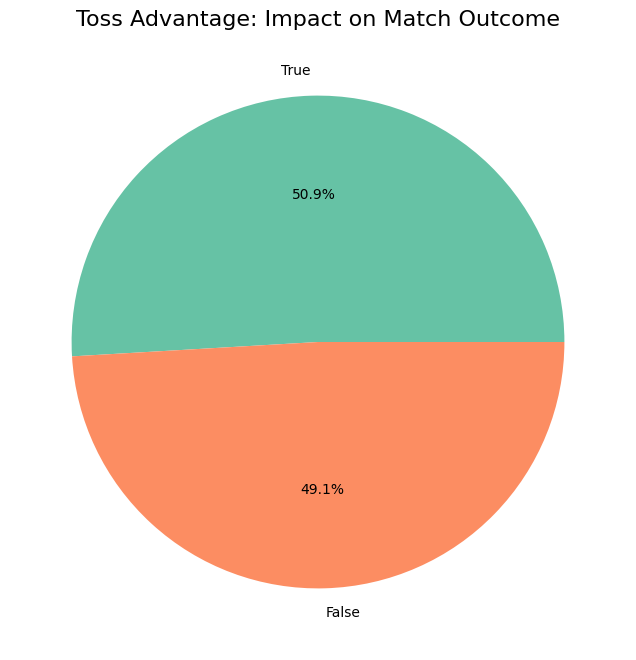

In [28]:

toss_advantage = (match_cleaned['toss_winner'] == match_cleaned['winner']).value_counts(normalize=True) * 100


toss_advantage_labels = {True: 'Toss Winner Wins', False: 'Toss Winner Loses'}


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
toss_advantage.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set2", len(toss_advantage)), legend=False)
plt.title('Toss Advantage: Impact on Match Outcome', fontsize=16)
plt.ylabel('')  
plt.xticks(rotation=0)
plt.show()


*50.9% of the teams who have won the toss first has won the match.*

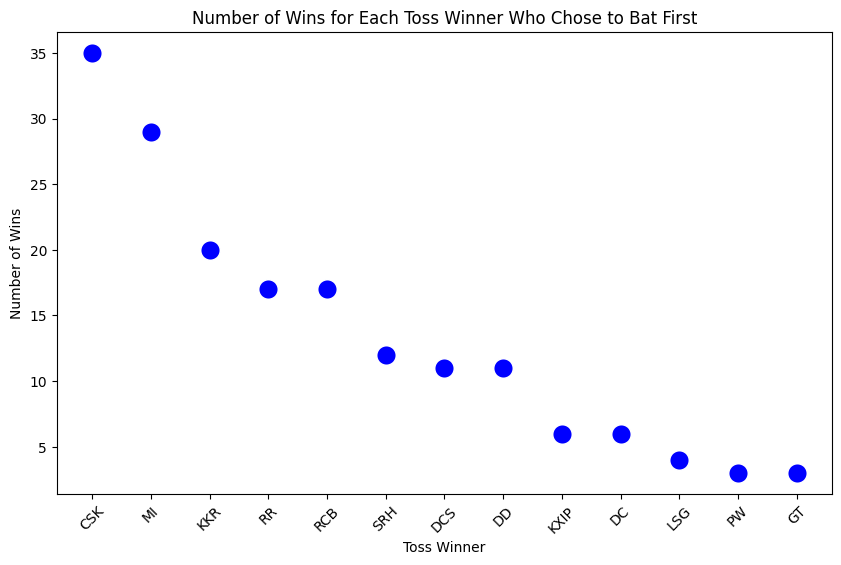

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

toss_bat_wins = match_cleaned[(match_cleaned['toss_decision'] == 'bat') & (match_cleaned['toss_winner'] == match_cleaned['winner'])]

wins_by_toss_winner = toss_bat_wins['toss_winner'].value_counts()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=wins_by_toss_winner.index, y=wins_by_toss_winner.values, color='blue', s=200)

plt.title('Number of Wins for Each Toss Winner Who Chose to Bat First')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


*Plot of teams who have chose bat first and won*

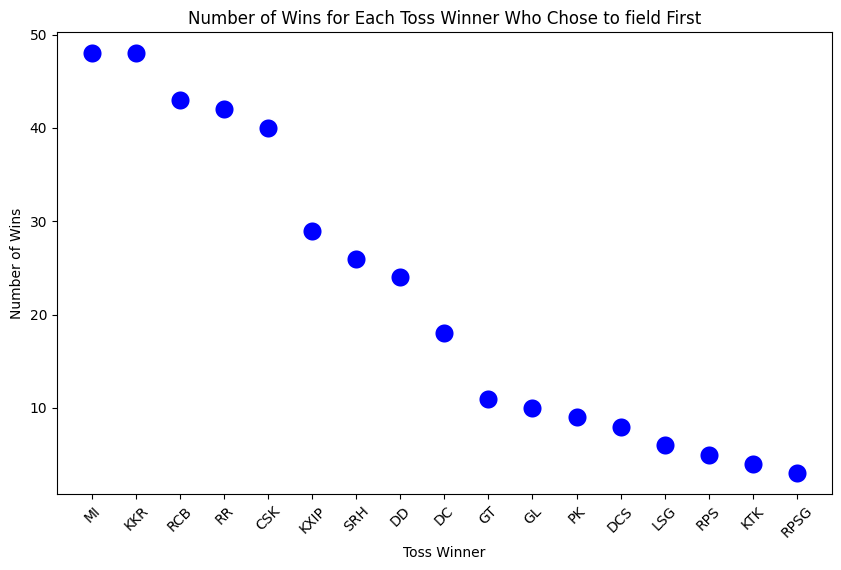

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

toss_bat_wins = match_cleaned[(match_cleaned['toss_decision'] == 'field') & (match_cleaned['toss_winner'] == match_cleaned['winner'])]

wins_by_toss_winner = toss_bat_wins['toss_winner'].value_counts()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=wins_by_toss_winner.index, y=wins_by_toss_winner.values, color='blue', s=200)

plt.title('Number of Wins for Each Toss Winner Who Chose to field First')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


*Plot of teams who have chose field first and won*

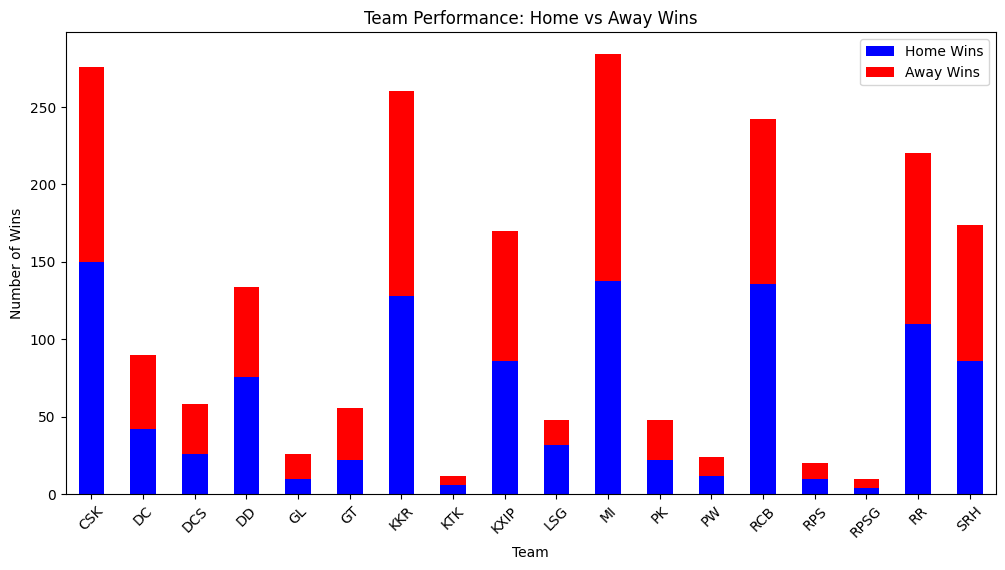

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the dataset loaded into 'ipl_data'

# Sample data (replace this with your actual dataset)

# 1. Create new columns for home and away wins
match_cleaned['home_win'] = match_cleaned.apply(
    lambda row: 1 if row['winner'] == row['team1'] else 0, axis=1
)

match_cleaned['away_win'] = match_cleaned.apply(
    lambda row: 1 if row['winner'] == row['team2'] else 0, axis=1
)

# 2. Group by teams and calculate the total number of home and away wins
home_away_wins = pd.DataFrame()

# For home wins, we sum over 'team1' (home team)
home_away_wins['home_win'] = match_cleaned.groupby('team1')['home_win'].sum()

# For away wins, we sum over 'team2' (away team)
home_away_wins['away_win'] = match_cleaned.groupby('team2')['away_win'].sum()

# 3. Combine home and away wins (ensure no team is missed)
# The teams in 'team1' (home teams) and 'team2' (away teams) might be different, so we combine the results
home_away_wins = home_away_wins.add(home_away_wins, fill_value=0)

# 4. Plotting a stacked bar plot
home_away_wins.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'red'])

# Titles and labels
plt.title('Team Performance: Home vs Away Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend(['Home Wins', 'Away Wins'])
plt.show()


*Above figure shows the influence of home stadiums for the teams*

In [32]:
team_wins = match_cleaned['winner'].value_counts()
total_matches = match_cleaned['team1'].value_counts() + match_cleaned['team2'].value_counts()
win_percentage = (team_wins / total_matches) * 100
win_percentage_sorted = win_percentage.sort_values(ascending=False)
print(win_percentage)


CSK     58.474576
DC      51.136364
DCS     38.666667
DD      42.405063
GL      44.827586
GT      62.222222
KKR     52.631579
KTK     42.857143
KXIP    45.698925
LSG     55.813953
MI      55.252918
PK      42.857143
PW      26.666667
RCB     48.594378
RPS     62.500000
RPSG    35.714286
RR      50.925926
SRH     48.876404
Name: count, dtype: float64


*Winning percentage of each teams*

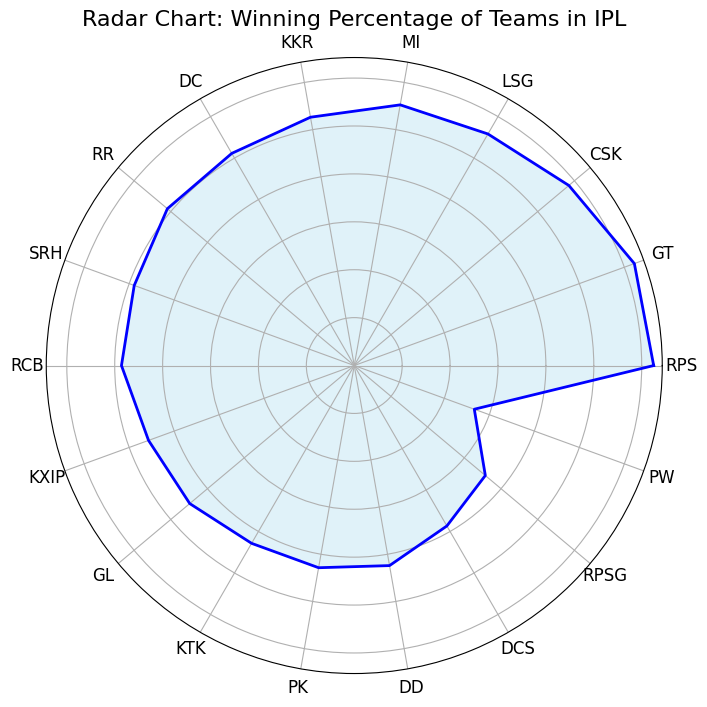

In [33]:
import numpy as np

# Create the radar chart
def plot_radar_chart(labels, values, title):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)

    plt.title(title, fontsize=16)
    plt.show()

# Data for radar chart
labels = win_percentage_sorted.index.tolist()
values = win_percentage_sorted.values.tolist()

# Plot the radar chart
plot_radar_chart(labels, values, 'Radar Chart: Winning Percentage of Teams in IPL')


*From the radar plot, it can be clearly seen that RPS (Rising pune super giants) has got the highest win percentage*

In [35]:
# Assuming the original DataFrame is 'match_cleaned'

# Create a deep copy of the DataFrame
deli_new = deli.copy()
deli_new['winners'] = match_cleaned['winner']
deli_new.head()

# Now 'new_match_data' is a separate copy of 'match_cleaned'


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,is_four,is_six,winners
0,335982,1,KKR,RCB,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,False,False,KKR
1,335982,1,KKR,RCB,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,False,False,CSK
2,335982,1,KKR,RCB,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,False,False,DD
3,335982,1,KKR,RCB,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,False,False,RCB
4,335982,1,KKR,RCB,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,False,False,KKR


In [48]:
import pandas as pd

# Assuming your original DataFrame is 'match_cleaned'

# Step 1: Create new columns to identify 4s and 6s scored by batsmen
deli_new['is_four'] = deli_new['batsman_runs'] == 4
deli_new['is_six'] = deli_new['batsman_runs'] == 6

new_match_data = deli_new[['batting_team', 'batsman_runs', 'is_four', 'is_six']].copy()

# Step 2: Count the number of 4s and 6s scored by each team (both home and away)
four_six_counts_home = new_match_data.groupby('batting_team')[['is_four', 'is_six']].sum()

# Combine the counts of 4s and 6s into a single variable (total boundaries)
four_six_counts_home['total_boundaries'] = four_six_counts_home['is_four'] + four_six_counts_home['is_six']

# Step 3: Calculate the total number of matches and wins for each team
team_wins = match_cleaned['winner'].value_counts()
total_matches = match_cleaned['team1'].value_counts() + match_cleaned['team2'].value_counts()
win_percentage = (team_wins / total_matches) * 100

# Step 5: Create a new DataFrame with the boundary counts and winning percentage
performance_df = four_six_counts_home.join(win_percentage)

# Step 6: Drop the 'is_four' and 'is_six' columns
performance_df = performance_df.drop(columns=['is_four', 'is_six'])

# Step 6: Display the new DataFrame
print(performance_df)


              total_boundaries      count
batting_team                             
CSK                       4705  58.474576
DC                        1902  51.136364
DCS                       1357  38.666667
DD                        2957  42.405063
GL                         615  44.827586
GT                         962  62.222222
KKR                       4956  52.631579
KTK                        223  42.857143
KXIP                      3706  45.698925
LSG                        909  55.813953
MI                        5322  55.252918
PK                        1235  42.857143
PW                         721  26.666667
RCB                       5031  48.594378
RPS                        286  62.500000
RPSG                       239  35.714286
RR                        4328  50.925926
SRH                       3447  48.876404


In [53]:
import pandas as pd

# Assuming 'deli_new' is your data and 'match_cleaned' is the match data

# Step 1: Create new columns to identify 4s and 6s scored by batsmen
deli_new['is_four'] = deli_new['batsman_runs'] == 4
deli_new['is_six'] = deli_new['batsman_runs'] == 6

# Create new dataframe with necessary columns
new_match_data = deli_new[['batting_team', 'batsman_runs', 'is_four', 'is_six']].copy()

# Step 2: Count the number of 4s and 6s scored by each team
four_six_counts_home = new_match_data.groupby('batting_team')[['is_four', 'is_six']].sum()

# Combine the counts of 4s and 6s into a single variable (total boundaries)
four_six_counts_home['total_boundaries'] = four_six_counts_home['is_four'] + four_six_counts_home['is_six']

# Step 3: Calculate the total number of matches played by each team
# Sum of occurrences of each team in 'team1' and 'team2' columns (matches played)
total_matches = match_cleaned['team1'].value_counts() + match_cleaned['team2'].value_counts()

# Step 4: Calculate the boundaries per match (total boundaries / total matches)
four_six_counts_home['boundaries_per_match'] = four_six_counts_home['total_boundaries'] / total_matches

# Step 5: Calculate the win percentage for each team
team_wins = match_cleaned['winner'].value_counts()
win_percentage = (team_wins / total_matches) * 100

# Step 6: Create a new DataFrame with the boundary counts and winning percentage
performance_df = four_six_counts_home.join(win_percentage)

# Step 7: Drop the 'is_four' and 'is_six' columns since they are no longer needed
performance_df = performance_df.drop(columns=['is_four', 'is_six'])

performance_df = performance_df.drop(columns=['total_boundaries'])

# Step 8: Display the new DataFrame
print(performance_df)


              boundaries_per_match      count
batting_team                                 
CSK                      19.936441  58.474576
DC                       21.613636  51.136364
DCS                      18.093333  38.666667
DD                       18.715190  42.405063
GL                       21.206897  44.827586
GT                       21.377778  62.222222
KKR                      20.064777  52.631579
KTK                      15.928571  42.857143
KXIP                     19.924731  45.698925
LSG                      21.139535  55.813953
MI                       20.708171  55.252918
PK                       22.053571  42.857143
PW                       16.022222  26.666667
RCB                      20.204819  48.594378
RPS                      17.875000  62.500000
RPSG                     17.071429  35.714286
RR                       20.037037  50.925926
SRH                      19.365169  48.876404


*Representation of boundaries a team has scored vs winning percentage*

/tmp/ipykernel_24/1199277609.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (performance_df.index[i], performance_df['boundaries_per_match'][i]),


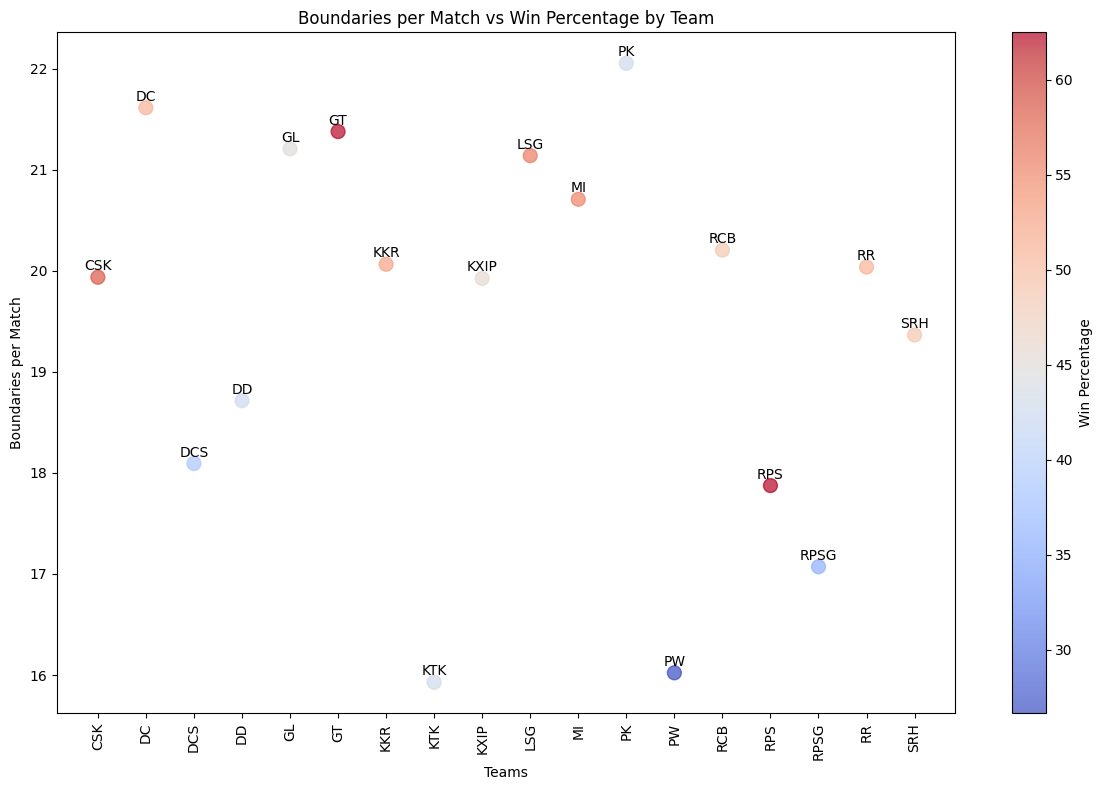

In [54]:
import matplotlib.pyplot as plt

# Assuming the 'four_six_counts' DataFrame has the 'boundaries_per_match' and we already have 'win_percentage'

# Add the 'win_percentage' to the 'four_six_counts' DataFrame (from previous calculations)
performance_df['win_percentage'] = win_percentage

# Step 1: Create a scatter plot
plt.figure(figsize=(12, 8))

# Step 2: Scatter plot: teams on x-axis, boundaries per match on y-axis, with color intensity based on win percentage
scatter = plt.scatter(performance_df.index, 
                      performance_df['boundaries_per_match'], 
                      c=performance_df['win_percentage'],  # Color based on win percentage
                      cmap='coolwarm',  # Color map style
                      s=100,  # Size of the points
                      alpha=0.7)  # Transparency

# Step 3: Add color bar for win percentage
plt.colorbar(scatter, label='Win Percentage')

# Step 4: Annotate the points with team names for clarity
for i, team in enumerate(performance_df.index):
    plt.annotate(team, 
                 (performance_df.index[i], performance_df['boundaries_per_match'][i]),
                 textcoords="offset points", xytext=(0, 5), ha='center')

# Step 5: Set labels and title
plt.xlabel('Teams')
plt.ylabel('Boundaries per Match')
plt.title('Boundaries per Match vs Win Percentage by Team')

# Step 6: Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Step 7: Display the plot
plt.tight_layout()
plt.show()


*Boundaries per match is compared with the winning percentage*

In [55]:
import pandas as pd

# Assuming match_cleaned is your DataFrame

# Step 1: Get the count of "Player of the Match" for each player
player_mom = match_cleaned['player_of_match'].value_counts()

# Step 2: Count boundaries (4s and 6s) scored by each player
# Create a column for identifying 4s and 6s scored
match_cleaned['is_four'] = deli_new['batsman_runs'] == 4
match_cleaned['is_six'] = deli_new['batsman_runs'] == 6

# Count the total number of 4s and 6s for each player
boundaries_by_player = match_cleaned.groupby('player_of_match')[['is_four', 'is_six']].sum()

# Calculate the total boundaries by adding the count of 4s and 6s
boundaries_by_player['total_boundaries'] = boundaries_by_player['is_four'] + boundaries_by_player['is_six']

# Step 3: Merge Player of the Match counts and total boundaries
result = player_mom.to_frame(name='player_mom_count')
result = result.merge(boundaries_by_player[['total_boundaries']], left_index=True, right_index=True, how='left')

# Step 4: Display the result
print(result)


                 player_mom_count  total_boundaries
player_of_match                                    
AB de Villiers                 24                 6
CH Gayle                       22                 3
RG Sharma                      19                 5
DA Warner                      18                 1
V Kohli                        17                 1
...                           ...               ...
CL White                        1                 0
A Chandila                      1                 0
MS Bisla                        1                 0
MS Gony                         1                 1
Shahbaz Ahmed                   1                 0

[290 rows x 2 columns]


/tmp/ipykernel_24/1397437363.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result.index, rotation=90)  # Rotate player names for better readability


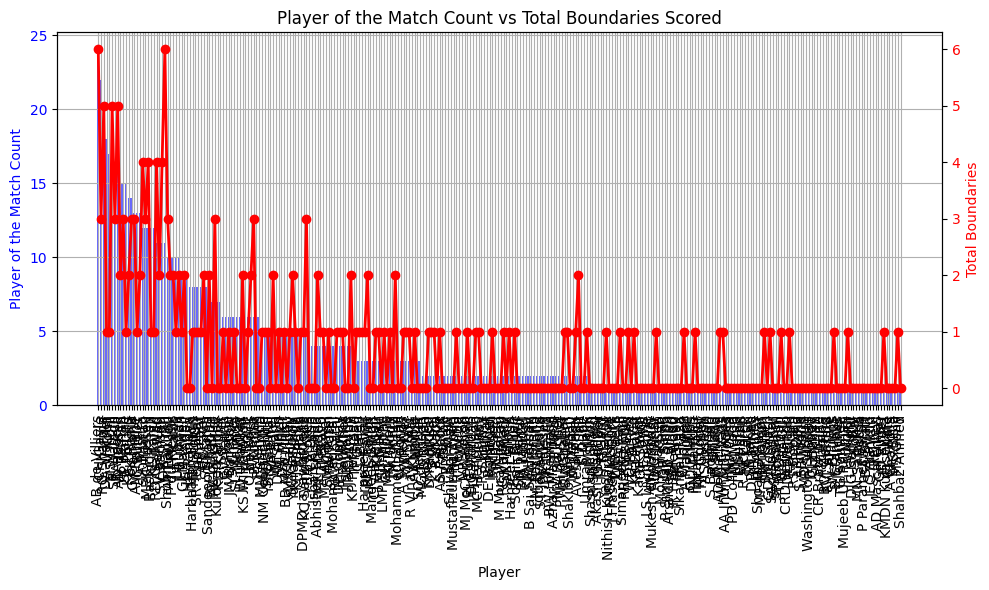

In [56]:
import matplotlib.pyplot as plt

# Assuming 'result' DataFrame contains the merged data with 'player_mom_count' and 'total_boundaries'

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the 'Player of the Match' counts on the left y-axis
ax1.bar(result.index, result['player_mom_count'], color='blue', alpha=0.6, label='Player of the Match Count')
ax1.set_xlabel('Player')
ax1.set_ylabel('Player of the Match Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(result.index, rotation=90)  # Rotate player names for better readability

# Create another axis for plotting the 'total_boundaries'
ax2 = ax1.twinx()
ax2.plot(result.index, result['total_boundaries'], color='red', marker='o', label='Total Boundaries', linewidth=2)
ax2.set_ylabel('Total Boundaries', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Player of the Match Count vs Total Boundaries Scored')
ax1.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [65]:
match_cleaned.rename(columns={'id': 'match_id'}, inplace=True)


In [66]:



deli_with_season = deli.merge(match_cleaned[['match_id', 'season']], on='match_id', how='left')


print(deli_with_season.head())


   match_id  inning batting_team bowling_team  over  ball       batter  \
0    335982       1          KKR          RCB     0     1   SC Ganguly   
1    335982       1          KKR          RCB     0     2  BB McCullum   
2    335982       1          KKR          RCB     0     3  BB McCullum   
3    335982       1          KKR          RCB     0     4  BB McCullum   
4    335982       1          KKR          RCB     0     5  BB McCullum   

    bowler  non_striker  batsman_runs  extra_runs  total_runs extras_type  \
0  P Kumar  BB McCullum             0           1           1     legbyes   
1  P Kumar   SC Ganguly             0           0           0         NaN   
2  P Kumar   SC Ganguly             0           1           1       wides   
3  P Kumar   SC Ganguly             0           0           0         NaN   
4  P Kumar   SC Ganguly             0           0           0         NaN   

   is_wicket player_dismissed dismissal_kind fielder  is_four  is_six   season  
0          

In [67]:
import pandas as pd


team_runs_per_match_season = deli_with_season.groupby(['season', 'match_id', 'batting_team'])['total_runs'].sum().reset_index()


highest_runs_per_game_season = team_runs_per_match_season.groupby(['season', 'match_id'])['total_runs'].max().reset_index()


highest_runs_per_season = highest_runs_per_game_season.groupby('season')['total_runs'].max().reset_index()


print(highest_runs_per_season)


     season  total_runs
0   2007/08         240
1      2009         211
2   2009/10         246
3      2011         232
4      2012         222
5      2013         263
6      2014         231
7      2015         235
8      2016         248
9      2017         230
10     2018         245
11     2019         232
12  2020/21         228
13     2021         235
14     2022         222
15     2023         257
16     2024         287


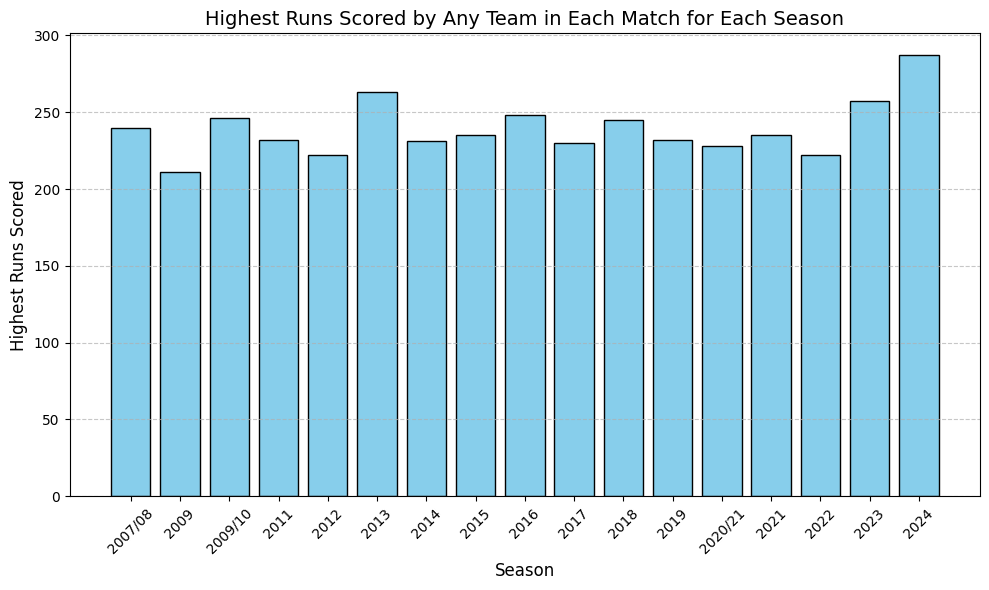

In [68]:
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))


plt.bar(highest_runs_per_season['season'], highest_runs_per_season['total_runs'], color='skyblue', edgecolor='black')


plt.title('Highest Runs Scored by Any Team in Each Match for Each Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Highest Runs Scored', fontsize=12)


plt.xticks(rotation=45)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()
